# Project 7.1: Building a Model to Predict Housing Prices

**Virginia Ogozalek**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project uses data analysis techniques and multiple linear regression to create three different models to predict housing prices based on a dataset for residential houses in Ames, Iowa. Various independent variables are selected to predict the dependent variable *SalePrice*, with the goal of producing models with better predictive accuracy than models presented in a Data Engineering course at MIT. A training set of data is used to develop the linear regression models, which are then run against a set of test data to assess predictive accuracy. Results show that increasing the number of observations in the training dataset increases the predictive accuracy of a model when it is run against the test dataset. Also, adding variables to existing variables in the regression model increases predictive accuracy when the additional variables have nonnegative correlations with *SalePrice*. 

[Back to top](#Index)


## 1. Introduction

One of the questions most often asked by prospective home sellers is, "What are the main factors that will affect the sale price of my home?" There is a wealth of anecdotal advice on that topic, ranging from "Add another bathroom," to "Build a deck," to "It's all about the schools," to "Put an apple pie in the oven on the day of the open house." 

The good news is that if enough data about past home sales in the same area are available, statistical analysis can test that anecdotal advice and make additional predictions about variables related to home sale prices. 

My project uses data analysis techniques and multiple linear regression to create three different models to predict housing prices based on a dataset for residential houses in Ames, Iowa. The Ames housing dataset was developed in 2011 by Dean de Cock as an alternative to the Boston housing data that has been used since 1978. Both the Ames and Boston housing sets have been extensively analyzed--a Google search on "Ames housing dataset" returns 218,000 results!

The general process I follow is to create a training set of data from the Ames housing data file and to use the training set to develop a regression model. I then run that regression model against a similar set of test data to see how accurately the model predicts the house sale prices. The workflow model for the project is shown below:

<img src="workflow2.png" width="600" height="600">
 
The modest goal of my project is to improve on the results obtained by Dr. John Williams of MIT in his previous analyses of a subset of the Ames housing data, as presented in the MIT Data Engineering Certification Course. It is a preliminary exploratory exercise into the use of multiple linear regression, undertaken with the expectation that it will raise more questions than it answers.

[Back to top](#Index)

## 2. The Data

The dataset used in this project contains 100 observations taken from the 2930 observations in the Ames, Iowa housing dataset. In addition, a test data file with 100 more observations is also provided. The dataset contains a large number of explanatory variables related to assessing sale prices of residential homes.

[Back to top](#Index)

### 2.1 Import the Data

The code below imports the necessary libraries and data for the project.

#### Libraries
The following libraries are imported:

|Library|Use|
|:------|:--|
|pandas|Python data analysis| 
|numpy|Python mathematical functions|
|matplotlib.pyplot|Python plotting library|
|sklearn linear_model|linear regression model|
|sklearn.metrics mean_absolute_error, mean_squared_error|metrics to assess accuracy of predictions|
|seaborn|advance Python plotting library|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns

#### Data Files
The code below reads the subset of the Ames housing data from the file *houseSmallData.csv* into the dataframe *data*. Then it reads the test data from the file *jtest.csv* into the dataframe *test*.

In [2]:
data = pd.read_csv('houseSmallData.csv')
test = pd.read_csv('jtest.csv')

#### Data Description
The Ames housing data contains 80 explanatory variables related to sale prices of residential houses. The following list describes the variables that will be used to make housing price predictions in this project:

The dataset used in this project contains 100 observations taken from the 2930 observations in the Ames, Iowa housing dataset.


|Variable|Description|
|:-------|:----------|
|SalePrice:|Sale price of house
|OverallQual:|Rates the overall material and finish of the house (score of 1–10)| 
|MasVnrArea:|Masonry veneer area in square feet|
|WoodDeckSF:|Wood deck area in square feet|
|FullBath:|Full bathrooms above grade|
|HalfBath:|Half baths above grade|
|BsmtFullBath:|Basement full bathrooms|
|BsmtHalfBath:|Basement half bathrooms|
|GrLivArea:|Above grade (ground) living area square feet|
|GarageArea:|Size of garage in square feet|
|GarageCars:|Size of garage in car capacity|
|YearBuilt:|Original construction date|
|TotalBsmtSF:|Total square feet of basement area|

[Back to top](#Index)

### 2.2 Data Exploration

When thinking about the variables that I consider most important to solve the problem of predicting housing prices, I drew on my experience of working for a Boston-based homebuilder, which included working closely with real estate agents and prospective buyers and being aware of what increased the selling price of the house. The agents constantly emphasized that one of the most important factors for home buyers is the quality of area schools, so I was most interested in exploring that connection. Upon exploring the data, I was surprised to discover that schools were not in the Ames dataset as a variable. 

Based on the variables that were included in the dataset, I decided to focus on deck area and number of bathrooms for Models 1 and 2 of my project, which I also recall as being desirable features for home buyers. For Model 3, I focused on total basement area, based on the variables that were used in the first MIT model.  

In addition, in order to compare my models to the MIT models, I also include those models in this project and further explore the variables used in both MIT models.

The code below explores the entire data set, including the variables that will used in this project. I also create scatterplots to display the relationship between each of these variables and the Sales Price data, with a description of the results for each plot. 

The code below shows the number of rows and columns in the *data* dataframe, and displays some of the data.

In [3]:
# The dataframe has 100 row and 82 columns, with 80 variables.
data.shape

(100, 82)

In [4]:
# The headers and first five rows of the data are shown below.
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The table shows the variables that will be used and what models they will be used in. Variables may be used in any of the models: the first MIT model, the secong MIT model, Model 1, Model 2, and Model 3. The variables that will be used in this project to solve the problem of predicting house sale prices are the following:



|Variable|Use|
|:-------|:--|
|SalePrice|First and Second MIT Models; Models 1, 2, and 3|
|OverallQual|First and Second MIT Models; Models 1, 2, and 3| 
|MasVnrArea|First MIT Model; Models 1 and 2|
|WoodDeckSF|Model 1|
|FullBath|Model 2|
|HalfBath|Model 2|
|BsmtFullBath|Model 2|
|BsmtHalfBath|Model 2|
|GrLivArea|Second MIT Model; Model 3|
|GarageArea|Second MIT Model; Model 3|
|GarageCars|Second MIT Model; Model 3|
|YearBuilt|Second MIT Model; Model 3|
|TotalBsmtSF|Model 3|

The scatter plots below display the relationships between the variables that will be used to solve the problem of predicting housing prices. A description is given for the results displayed by each plot.

#### Overall Quality and Sale Price
The plot shows a possible linear relationship between the overall quality rating and the sale price. OverallQual is a discrete numeric variable, which accounts for the clustering of data points in the plot.

Text(0, 0.5, 'Sale Price ($)')

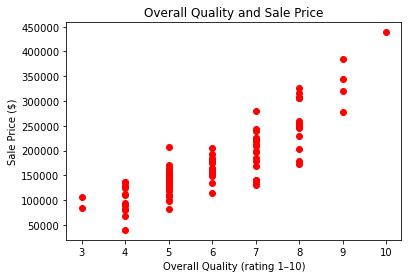

In [5]:
plt.scatter(data['OverallQual'],data['SalePrice'],color='r')
plt.title('Overall Quality and Sale Price')
plt.xlabel('Overall Quality (rating 1–10)')
plt.ylabel('Sale Price ($)')

#### Masonry Veneer Area and Sale Price
The plot shows a possible linear relationship between the masonry veneer area and the sale price. The cluster of points at 0 on the *x*-axis represent houses without veneers.

Text(0, 0.5, 'Sale Price ($)')

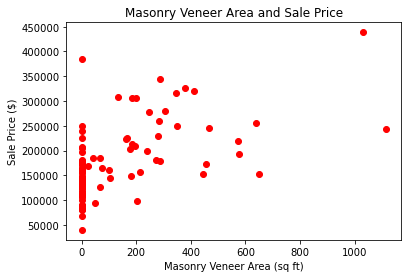

In [6]:
plt.scatter(data['MasVnrArea'],data['SalePrice'],color='r')
plt.title('Masonry Veneer Area and Sale Price')
plt.xlabel('Masonry Veneer Area (sq ft)')
plt.ylabel('Sale Price ($)')

#### Wood Deck Area and Sale Price
The plot shows a possible linear relationship between the wood deck area and the sale price. The cluster of points at 0 on the *x*-axis represent houses without decks.

Text(0, 0.5, 'Sale Price ($)')

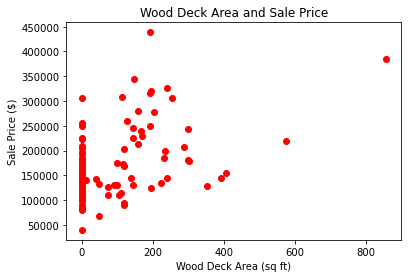

In [7]:
plt.scatter(data['WoodDeckSF'],data['SalePrice'],color='r')
plt.title('Wood Deck Area and Sale Price')
plt.xlabel('Wood Deck Area (sq ft)')
plt.ylabel('Sale Price ($)')

#### Number of Full Baths and Sale Price
The plot shows a possible linear relationship between the number of full baths and the sale price. FullBath is a discrete numeric variable with only four observed values, which accounts for the clustering of data points in the plot.

([<matplotlib.axis.XTick at 0x7fea5282a610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

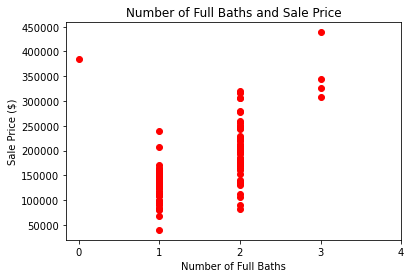

In [8]:
plt.scatter(data['FullBath'],data['SalePrice'],color='r')
plt.title('Number of Full Baths and Sale Price')
plt.xlabel('Number of Full Baths')
plt.ylabel('Sale Price ($)')
plt.xticks(np.arange(0, 5, 1))

#### Number of Half Baths and Sale Price
The plot shows a possible linear relationship between the number of half baths and the sale price. HalfBath is a discrete numeric variable with only two observed values, which accounts for the clustering of data points in the plot.

([<matplotlib.axis.XTick at 0x7fea52bdea00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

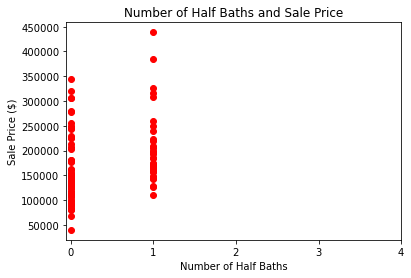

In [9]:
plt.scatter(data['HalfBath'],data['SalePrice'],color='r')
plt.title('Number of Half Baths and Sale Price')
plt.xlabel('Number of Half Baths')
plt.ylabel('Sale Price ($)')
plt.xticks(np.arange(0, 5, 1))

#### Number of Basement Full Baths and Sale Price
The plot shows a possible linear relationship between the number of basement full baths and the sale price. BsmtFullBath is a discrete numeric variable with only three observed values, which accounts for the clustering of data points in the plot.

([<matplotlib.axis.XTick at 0x7fea52cb7df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

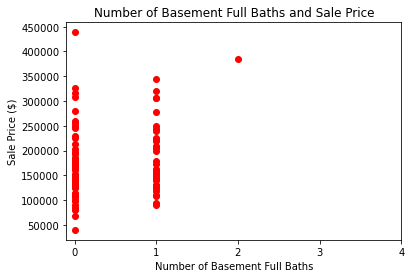

In [10]:
plt.scatter(data['BsmtFullBath'],data['SalePrice'],color='r')
plt.title('Number of Basement Full Baths and Sale Price')
plt.xlabel('Number of Basement Full Baths')
plt.ylabel('Sale Price ($)')
plt.xticks(np.arange(0, 5, 1))

#### Number of Basement Half Baths and Sale Price
The plot shows a linear relationship between the number of basement half baths and the sale price. BsmtHalfBath is a discrete numeric variable with only two observed values, which accounts for the clustering of data points in the plot.

([<matplotlib.axis.XTick at 0x7fea52a972b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

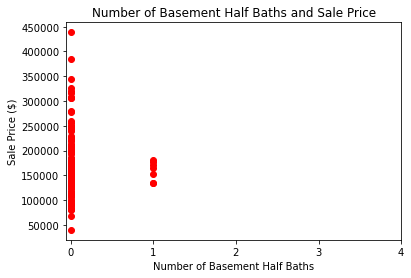

In [11]:
plt.scatter(data['BsmtHalfBath'],data['SalePrice'],color='r')
plt.title('Number of Basement Half Baths and Sale Price')
plt.xlabel('Number of Basement Half Baths')
plt.ylabel('Sale Price ($)')
plt.xticks(np.arange(0, 5, 1))

#### Above-Ground Living Area and Sale Price
The plot shows a possible linear relationship between the above-ground living area and the sale price, although the upward curve at the right of the plot suggests there may be a different relationship between the variables..

Text(0, 0.5, 'Sale Price ($)')

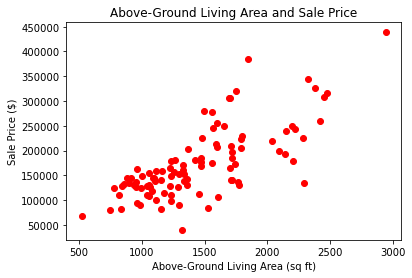

In [13]:
plt.scatter(data['GrLivArea'],data['SalePrice'],color='r')
plt.title('Above-Ground Living Area and Sale Price')
plt.xlabel('Above-Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

#### Garage Area and Sale Price
The plot shows a possible linear relationship between the garage area and the sale price.

Text(0, 0.5, 'Sale Price ($)')

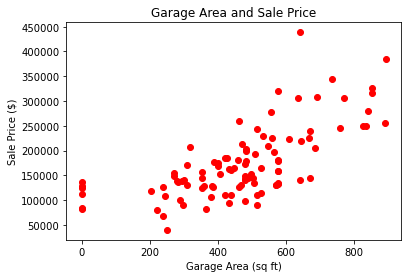

In [14]:
plt.scatter(data['GarageArea'],data['SalePrice'],color='r')
plt.title('Garage Area and Sale Price')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price ($)')

#### Garage Car Capacity and Sale Price
The plot shows a possible linear relationship between the car capacity of the garage and the sale price. GarageCars is a discrete numeric variable with only four observed values, which accounts for the clustering of data points in the plot.

([<matplotlib.axis.XTick at 0x7fea5302fd00>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

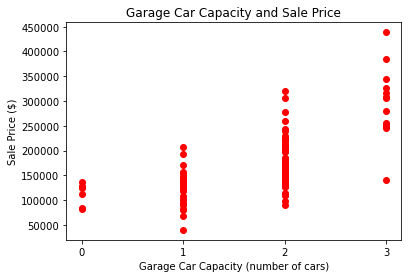

In [15]:
plt.scatter(data['GarageCars'],data['SalePrice'],color='r')
plt.title('Garage Car Capacity and Sale Price')
plt.xlabel('Garage Car Capacity (number of cars)')
plt.ylabel('Sale Price ($)')
plt.xticks(np.arange(0, 4, 1))

#### Year Built and Sale Price
The plot shows a possible linear relationship between the year the house was built and the sale price, although the upward curve at the right of the plot suggests there may be a different relationship between the variables. 

Text(0, 0.5, 'Sale Price ($)')

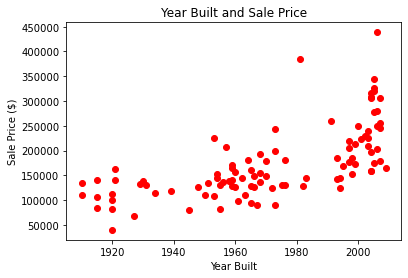

In [16]:
plt.scatter(data['YearBuilt'],data['SalePrice'],color='r')
plt.title('Year Built and Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price ($)')

#### Total Basement Area and Sale Price
The plot shows a possible linear relationship between the total basement area and the sale price, although the upward curve at the right of the plot suggest there may be a different relationship between the variables.

Text(0, 0.5, 'Sale Price ($)')

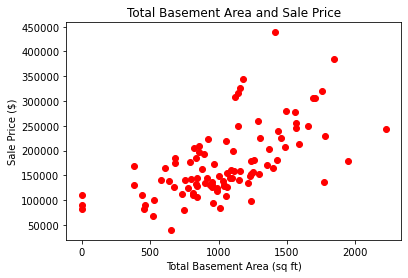

In [17]:
plt.scatter(data['TotalBsmtSF'],data['SalePrice'],color='r')
plt.title('Total Basement Area and Sale Price')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('Sale Price ($)')

[Back to top](#Index)

### 2.3 Data Preparation

The Ames housing data file contains records for 100 home sales. The first MIT model uses the first 20 records as the training set, while in the second MIT model all 100 records are used as the training set. In this project, Model 1 and Model 2 will be based on the approach used for the first MIT model, while Model 3 will be based on the approach used for the second MIT model.

The code below copies the data from the *data* dataframe into two dataframes for training. The *train* dataframe is a subset of the *data* dataframe that contains the first 20 rows of data and corresponds to the training data for the first MIT model. The *train2* dataframe contains all 100 rows of data from the *data* dataframe and corresponds to the training data for the second MIT model.

The *houseSmallData.csv* file includes variables that contain nonnumeric data. In the code below, these columns are identified and removed from the *train* and *train2* dataframes. In the remaining columns, null values are replaced using linear interpolation by averaging the values in the two adjacent columns. If interpolation is not possible in a column, this column is also removed from the dataframe.

The data from *jtest.csv* are cleaned in the same way.

In [18]:
# Show the original data dataframe.
data

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [19]:
# The train dataframe contains the first 20 rows of the data dataframe.
train = data.iloc[0:20,:]
train.shape

(20, 82)

In [20]:
# Since train is a data frame, SalePrice is a series.
# Since SalePrice is a series, you can use "describe" on it.
salePrice = train['SalePrice']
salePrice.describe()

count        20.000000
mean     181270.000000
std       68215.603247
min       90000.000000
25%      137250.000000
50%      153000.000000
75%      212250.000000
max      345000.000000
Name: SalePrice, dtype: float64

In [21]:
# The train dataframe is shown.
train

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [22]:
# Columns containing nonnumeric data are removed from the train dataframe.
# Null values are replaced using linear interpolation.
# The number of columns is reduced from 82 to 39.
train = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(train.isnull().sum() != 0) # checks that there are no more null values
train.shape

(20, 39)

In [23]:
# The train dataframe is shown after cleaning.
# Data can be checked to make sure null values have been replaced using line interpolation.
# Ex. The NaN value for LotFrontage in row 7 has been replaced by 63.0, which is the average of 75.0 in row 6
# and 51.0 in row 8.
train

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
5,5,6,50,85.0,14115,5,5,1993,1995,0.0,...,40,30,0,320,0,0,700,10,2009,143000
6,6,7,20,75.0,10084,8,5,2004,2005,186.0,...,255,57,0,0,0,0,0,8,2007,307000
7,7,8,60,63.0,10382,7,6,1973,1973,240.0,...,235,204,228,0,0,0,350,11,2009,200000
8,8,9,50,51.0,6120,7,5,1931,1950,0.0,...,90,0,205,0,0,0,0,4,2008,129900
9,9,10,190,50.0,7420,5,6,1939,1950,0.0,...,0,4,0,0,0,0,0,1,2008,118000


In [24]:
# The train2 dataframe contains all 100 rows of the data dataframe.
train2 = data.iloc[0:100,:]
train2.shape

(100, 82)

In [25]:
# Since train2 is a data frame, SalePrice is a series.
# Since SalePrice is a series, you can use "describe" on it.
salePrice = train2['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

In [26]:
# Sections of the train dataframe are shown.
train2.head

<bound method NDFrame.head of     Unnamed: 0   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0            0    1          60       RL         65.0     8450   Pave   NaN   
1            1    2          20       RL         80.0     9600   Pave   NaN   
2            2    3          60       RL         68.0    11250   Pave   NaN   
3            3    4          70       RL         60.0     9550   Pave   NaN   
4            4    5          60       RL         84.0    14260   Pave   NaN   
..         ...  ...         ...      ...          ...      ...    ...   ...   
95          95   96          60       RL          NaN     9765   Pave   NaN   
96          96   97          20       RL         78.0    10264   Pave   NaN   
97          97   98          20       RL         73.0    10921   Pave   NaN   
98          98   99          30       RL         85.0    10625   Pave   NaN   
99          99  100          20       RL         77.0     9320   Pave   NaN   

   LotShape LandConto

In [27]:
# Columns containing nonnumeric data are removed from the train2 dataframe.
# Null values are replaced using linear interpolation.
# The number of columns is reduced from 82 to 39.
train2 = train2.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(train2.isnull().sum() != 0) # checks that there are no more null values
train2.shape

(100, 39)

In [28]:
# The train2 dataframe is shown after cleaning.
# Data can be checked to make sure null values have been replaced using line interpolation.
# Ex. The NaN value for LotFrontage in row 95 has been replaced by 73.5.
train2

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,73.5,9765,6,8,1993,1993,68.0,...,232,63,0,0,0,0,480,4,2009,185000
96,96,97,20,78.0,10264,7,5,1999,1999,183.0,...,158,29,0,0,0,0,0,8,2006,214000
97,97,98,20,73.0,10921,4,5,1965,1965,48.0,...,120,0,0,0,0,0,0,5,2007,94750
98,98,99,30,85.0,10625,5,5,1920,1950,0.0,...,0,0,77,0,0,0,400,5,2010,83000


In [29]:
# The test dataframe contains 100 rows of test data.
test

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
96,196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
97,197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
98,198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


In [30]:
# Since test is a data frame, SalePrice is a series.
# Since SalePrice is a series, you can use "describe" on it.
salePrice = test['SalePrice']
salePrice.describe()

count       100.000000
mean     190895.460000
std       80231.911674
min       79000.000000
25%      130000.000000
50%      176500.000000
75%      226500.000000
max      501837.000000
Name: SalePrice, dtype: float64

In [31]:
# Testclean is a copy of the test dataframe that will be cleaned.
testclean = test.iloc[0:100,:]
testclean.shape

(100, 82)

In [32]:
# Columns containing nonnumeric data are removed from the testclean dataframe.
# Null values are replaced using linear interpolation.
# The number of columns is reduced from 82 to 38.
# One more column is dropped in testclean than in train and train2.  
testclean = testclean.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(testclean.isnull().sum() != 0) # checks that there are no more null values
testclean.shape

(100, 38)

In [33]:
# The testclean dataframe is shown after cleaning.
testclean

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,100,101,20,10603,6,7,1977,2001,28.0,1200,...,168,68,0,0,0,0,0,2,2010,205000
1,101,102,60,9206,6,5,1985,1985,336.0,0,...,192,46,0,0,0,0,0,6,2010,178000
2,102,103,90,7018,5,5,1979,1979,0.0,0,...,0,0,0,0,0,0,0,6,2009,118964
3,103,104,20,10402,7,5,2009,2009,0.0,0,...,0,36,0,0,0,0,0,5,2010,198900
4,104,105,50,7758,7,4,1931,1950,600.0,224,...,0,0,0,0,184,0,0,6,2007,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,2280,6,6,1976,1976,0.0,566,...,87,0,0,0,0,0,0,7,2009,148500
96,196,197,20,9416,7,5,2007,2007,205.0,1126,...,171,138,0,0,266,0,0,9,2007,311872
97,197,198,75,25419,8,4,1918,1990,0.0,1036,...,0,16,552,0,0,512,0,3,2006,235000
98,198,199,75,5520,6,6,1912,1950,0.0,0,...,0,198,30,0,0,0,0,7,2009,104000


[Back to top](#Index)

### 2.4 Correlation

This section describes the correlations between SalePrice and all the variables in the data. The correlations provide information for making an educated guess about how to proceed with an analysis. Different variables can be explored based on the correlations found. Variables that have strong positive correlations with SalesPrice will be included in the models.   

#### Correlations Based on the First MIT Model

These are the correlations for the models based on the first MIT model. The correlations are from the *train* dataframe, which contains only the first 20 rows of the *data* dataframe.


In [36]:
# A pairwise correlation of 39 variables from the train dataframe (first 20 rows of data) 
# produces the corr dataframe with 39 rows and 39 columns.
corr = train.corr()
corr.shape

(39, 39)

In [37]:
# Look at all the correlations with SalePrice, in descending order.
cols = corr['SalePrice'].sort_values(ascending=False)
cols

SalePrice        1.000000
OverallQual      0.807380
MasVnrArea       0.788274
FullBath         0.721954
TotRmsAbvGrd     0.699634
YearBuilt        0.699627
YearRemodAdd     0.698731
GarageArea       0.696998
BedroomAbvGr     0.681291
GrLivArea        0.676909
TotalBsmtSF      0.651318
GarageYrBlt      0.649557
WoodDeckSF       0.575730
GarageCars       0.571377
LotFrontage      0.513583
1stFlrSF         0.449307
2ndFlrSF         0.419880
BsmtFinSF1       0.400864
Fireplaces       0.374814
MoSold           0.328774
LotArea          0.265787
BsmtFullBath     0.222720
BsmtUnfSF        0.174284
OpenPorchSF      0.131968
HalfBath         0.113692
BsmtFinSF2       0.064627
BsmtHalfBath     0.000794
ScreenPorch     -0.128599
3SsnPorch       -0.132049
EnclosedPorch   -0.182838
MSSubClass      -0.199414
OverallCond     -0.260414
YrSold          -0.262237
MiscVal         -0.283727
Id              -0.298403
Unnamed: 0      -0.298403
KitchenAbvGr    -0.433657
LowQualFinSF          NaN
PoolArea    

#### Correlations Based on the Second MIT Model

These are the correlations for the models based on the second MIT model. The correlations are from the *train2* dataframe, which contains all of the 100 rows of the *data* dataframe.

In [38]:
# A pairwise correlation of 39 variables from the train2 dataframe (all 100 rows of data)
# produces the corrt2 dataframe with 39 rows and 39 columns.
corrt2 = train2.corr()
corrt2.shape

(39, 39)

In [39]:
# Look at all the correlations with SalePrice, in descending order.
cols = corrt2['SalePrice'].sort_values(ascending=False)
cols

SalePrice        1.000000
OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.589361
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
OpenPorchSF      0.301960
LotFrontage      0.277853
BsmtFinSF1       0.266713
MoSold           0.256863
BedroomAbvGr     0.233426
BsmtFullBath     0.155689
ScreenPorch      0.035930
3SsnPorch       -0.019391
BsmtHalfBath    -0.055100
MSSubClass      -0.066819
MiscVal         -0.134707
BsmtFinSF2      -0.138126
LowQualFinSF    -0.150027
Id              -0.162735
Unnamed: 0      -0.162735
OverallCond     -0.170443
EnclosedPorch   -0.233483
KitchenAbvGr    -0.235659
YrSold          -0.262683
PoolArea    


[Back to top](#Index)

## 3. Project Description

In this project, three different models are created based on the first and second MIT models. Variables used in the MIT models are included in the models, and then other variables are added.

* Model 1 builds on the strategy in the first MIT model of using the top two variables in the sorted correlation list. The added variable is selected based findings from the Coldwell-Banker Elite real estate company, that adding a deck to a home is one of the ten best strategies for increasing return-on-investment. 


* Model 2 builds on the same MIT model strategy as Model 1. The added variable is selected based on findings that one more bathroom can boost a home's selling price by 6%. Two analyses are included in this model: (1) above-ground full baths only and (2) above-ground full and half baths and basement full and half baths.


* Model 3 builds on the strategy in the second MIT model of using the top five variables in the sorted correlation coefficient list for the regression analysis. Model 3 adds the sixth variable in the list to the model.

The regression analyses for all models are shown. In all three models, findings suggest that predictive accuracy is improved by adding variables to those already analyzed in the first and second MIT models. 

[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is used to predict the value of one variable, called the dependent variable, based on the value of another variable, called the independent variable. Simple linear regression involves one independent variable and one dependent variable, and the model is a "line of best fit" that minimizes the prediction error for all data points, as shown in the graph below.

<img src="linear_regression_source.png" width="400" height="400">

Multiple linear regression involves multiple independent variables, and the model is a fitted surface that minimizes the prediction error for all data points. The graph below visualizes a multiple linear regression.

<img src="multiple_linear_regression.png" width="600" height="600">

This project uses the sklearn linear regression model to perform the multiple linear regressions. Unlike the simple linear regression model, which results in a single line of best fit with 1 optimized variable coefficient and 1 optimized intercept coefficient, the model for multiple linear regression finds a hyperplane of best fit for *n* variables, with *n*  optimized coefficients and 1 optimized intercept coefficient.

To find the optimal hyperplane coefficients, the sklearn model uses the Ordinary Least Squares procedure, derived from Gauss-Markov theorem. The hyperplane is defined as:

<a id="expressionID"></a>

${Y} = {\beta}_{0} + {\beta}_{1}{x}_{1} + {\beta}_{2}{x}_{2} + ... + {\beta}_{k}{x}_{k} + {\epsilon}$


The ${\beta}_{0}$ is the optimized intercept coefficient and ${\beta}_{1}...{\beta}_{k}$ are the optimized coefficients, all of which are estimated using the Ordinary Least Squares procedure. The ${\epsilon}$ is the random error.     

To implement the algorithm using Python, values for the independent variables are stored in a dataframe (*X*) and values for the dependent variable are stored in a series (*Y*). The fit method for sklearn linear regression is called with *X* and *Y* as parameters, producing the regression model for the data. To make predictions using the model, the predict method is called with *X* as a parameter. To assess the accuracy of the predictions, find *R*-squared by calling the score method with *X* and *Y* as parameters.      

[Back to top](#Index)

### 3.2 Analysis 

The analysis section shows the implementation of the algorithm according to the first and second MIT videos. My first two models, Model 1 and Model 2 (2a and 2b), follow the approach in the first MIT model. My third model, Model 3, follows the approach in the second MIT model.

Both MIT models are included for analysis purposes.

#### First MIT Model: Overall Quality and Masonry Veneer Area 
The code below is from the first MIT model that uses the two variables with the greatest correlation coefficients for sale price based on the *train1* data (first 20 rows): OverallQual and MasVnrArea.

In [40]:
# Include three variables with the greatest correlation coefficients
cols79 = ['SalePrice','OverallQual', 'MasVnrArea']

# Assign OverallQual and MasVnrArea to X, SalePrice to Y
X = train[cols79]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

# Run the linear regression model
lr = linear_model.LinearRegression()
model79 = lr.fit(X,Y)
predictions79 = model79.predict(X)

# Find R-squared
print(f"R^2 is: {model79.score(X,Y)}")

# Save values for futue analysis
X79 = X
Y79 = Y

R^2 is: 0.7501993255220817


Text(0, 0.5, 'Observed Sale Price ($)')

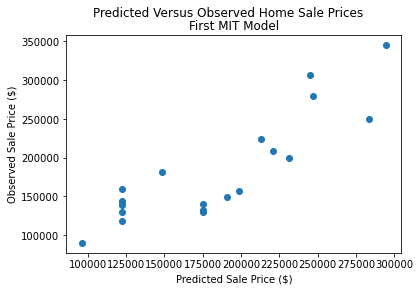

In [41]:
# Plot predicted versus observed home sale prices for the first MIT Model.
plt.scatter(predictions79, Y)
plt.suptitle('Predicted Versus Observed Home Sale Prices')
plt.title('First MIT Model')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Observed Sale Price ($)')

#### Model 1: Add Area of Wooden Deck to Overall Quality and Masonry Veneer Area 
This model builds on the first MIT model by adding the variable WoodDeckSF to OverallQual and MasVnrArea. Model 1 improves the results of the first MIT model, as shown by comparing the *R*-Squared values: 0.7882 > 0.7502.  

In [42]:
# Add wood deck to model from Video 7.9
cols1 = ['SalePrice','OverallQual', 'MasVnrArea', 'WoodDeckSF']

# Assign OverallQual, MasVnrArea, and WoodDeckSF to X; SalePrice to Y
X = train[cols1]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

# Run the linear regression model
lr = linear_model.LinearRegression()
model1 = lr.fit(X,Y)
predictions1 = model1.predict(X)

# Find R-squared
print(f"R^2 is: {model1.score(X,Y)}")

# Save values for futue analysis
X1 = X
Y1 = Y

R^2 is: 0.7882000636533495


Text(0, 0.5, 'Observed Sale Price ($)')

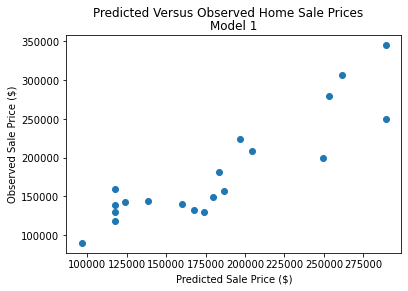

In [43]:
# Plot predicted versus observed home sale prices for Model 1.
plt.scatter(predictions1, Y)
plt.suptitle('Predicted Versus Observed Home Sale Prices')
plt.title('Model 1')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Observed Sale Price ($)')

#### Model 2: Add Number of Bathrooms to Overall Quality and Masonry Veneer Area 
This model builds on the first MIT model by first adding the variable FullBath to OverallQual and MasVnrArea. Then in a second analysis three additional variables are added: HalfBath, BsmtFullBath, and BsmtHalfBath. 

Model 2-1 improves the results of the first MIT model, as shown by comparing the *R*-Squared values: 0.7875 > 0.7502. Model 2-1 does not improve on Model 1, however, even though the correlation between FullBath and SalePrice is stronger than the correlation between WoodDeckSF and SalePrice: 0.0.7875 < 0.7882 

Model 2-2 also improves the results from the first MIT model (0.8166 > 0.7502) as well as the results from Model 1 (0.8166 > 0.7882). 

In [44]:
# Model 2a
# Add full baths to model from Video 7.9
cols2 = ['SalePrice','OverallQual', 'MasVnrArea', 'FullBath']

# Assign OverallQual, MasVnrArea, and FullBath to X; SalePrice to Y
X = train[cols2]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

# Run the linear regression model
lr = linear_model.LinearRegression()
model2 = lr.fit(X,Y)
predictions2 = model2.predict(X)

# Find R-squared
print(f"R^2 is: {model2.score(X,Y)}")

# Save values for futue analysis
X2 = X
Y2 = Y

R^2 is: 0.787534681212753


Text(0, 0.5, 'Observed Sale Price ($)')

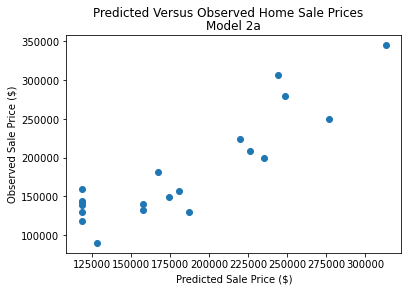

In [45]:
# Plot predicted versus observed home sale prices for Model 2-1.
plt.scatter(predictions2, Y)
plt.suptitle('Predicted Versus Observed Home Sale Prices')
plt.title('Model 2a')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Observed Sale Price ($)')

In [46]:
# Model 2b
# Add full, half, full-basement, and half-basement bathrooms to model from Video 7.9
cols2a = ['SalePrice','OverallQual', 'MasVnrArea', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

# Assign OverallQual, MasVnrArea, FullBath, HalfBath, BsmtFullBath, and BsmtHalfBath to X; SalePrice to Y
X = train[cols2a]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)

# Run the linear regression model
lr = linear_model.LinearRegression()
model2a = lr.fit(X,Y)
predictions2a = model2a.predict(X)

# Find R-squared
print(f"R^2 is: {model2a.score(X,Y)}")
model2a.score(X,Y)

# Save values for futue analysis
X2a = X
Y2a = Y

R^2 is: 0.8165819933837561


Text(0, 0.5, 'Observed Sale Price ($)')

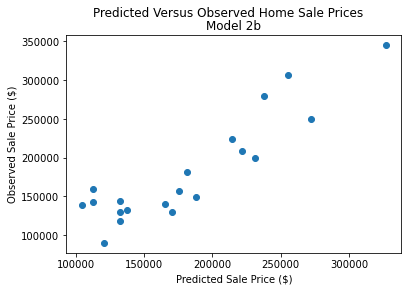

In [47]:
# Plot predicted versus observed home sale prices for Model 2b.
plt.scatter(predictions2a, Y)
plt.suptitle('Predicted Versus Observed Home Sale Prices')
plt.title('Model 2b')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Observed Sale Price ($)')

#### The Second MIT Model: Overall Quality, Above-Ground Living Area, Garage Area, Garage Car Capacity, and Year Built 
The code below is from the second MIT model that uses the five variables with the greatest correlation coefficiients for sales price based on the *train2* data (all 100 rows): OverallQual, GrLivArea, GarageArea, GarageCars, and YearBuilt.

In [51]:
# Look at the correlations from the train2 dataframe (all 100 rows of data)
# to identify the 5 variables from the train2 dataframe that have
# the strongest positive correlations with SalePrice.
# (Note that SalePrice is also included because it has a correlation of 1 with itself.)
colst2 = corrt2['SalePrice'].sort_values(ascending=False)[0:6]
colst2

SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
GarageCars     0.663441
YearBuilt      0.658636
Name: SalePrice, dtype: float64

In [52]:
# Identify the 6 columns that are used in the second MIT model.
colst2 = corrt2['SalePrice'].sort_values(ascending=False)[0:6].index
colst2

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt'],
      dtype='object')

In [53]:
# Assign OverallQual, GrLivArea, GarageArea, GarageCars, and YearBuilt to X; SalePrice to Y
X = train2[colst2]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis=1)

# Run the linear regression model
lr = linear_model.LinearRegression()
model710 = lr.fit(X,Y)
predictions710 = model710.predict(X)

# Find R-squared
print(f"R^2 is: {model710.score(X,Y)}")

# Save values for futue analysis
X710 = X
Y710 = Y

R^2 is: 0.8309859964337734


Text(0, 0.5, 'Observed Sale Price ($)')

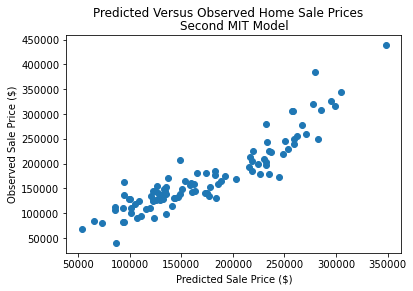

In [54]:
# Plot predicted versus observed home sale prices for the second MIT Model.
plt.scatter(predictions710, Y)
plt.suptitle('Predicted Versus Observed Home Sale Prices')
plt.title('Second MIT Model')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Observed Sale Price ($)')

#### Model 3: Add Total Basement Area to Overall Quality, Above-Ground Living Area, Garage Area, Garage Car Capacity, and Year Built 
This model builds on the approach used in the second MIT model by adding the variable TotalBsmtSF to OverallQual and MasVnrArea. 

Model 3 improves the results of the second MIT model, as shown by comparing the R-Squared values: 0.8490 > 0.8310. 

Model 3 also improves the results of Model 1 (0.8490 > 0.7882), Model 2a (0.8490 > 0.7875), and Model 2b (0.8490 > 0.8166). 

In [55]:
# For this project, look at the correlations again and add the variable with the 
# next strongest positive correlation to the existing list from the second MIT model.
colst2a = corrt2['SalePrice'].sort_values(ascending=False)[0:7]
colst2a

SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
GarageCars     0.663441
YearBuilt      0.658636
TotalBsmtSF    0.616297
Name: SalePrice, dtype: float64

In [56]:
# Identify the 7 columns that are used in the new model for this project.
colst2a = corrt2['SalePrice'].sort_values(ascending=False)[0:7].index
colst2a

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF'],
      dtype='object')

In [57]:
# Assign OverallQual, GrLivArea, GarageArea, GarageCars, YearBuilt, and TotalBsmtSF to X; SalePrice to Y
X = train2[colst2a]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis=1)

# Run the linear regression model
lr = linear_model.LinearRegression()
model3 = lr.fit(X,Y)
predictions3 = model3.predict(X)

# Find R-squared
print(f"R^2 is: {model3.score(X,Y)}")

# Save values for futue analysis
X3 = X
Y3 = Y

R^2 is: 0.8489694682378787


Text(0, 0.5, 'Observed Sale Price ($)')

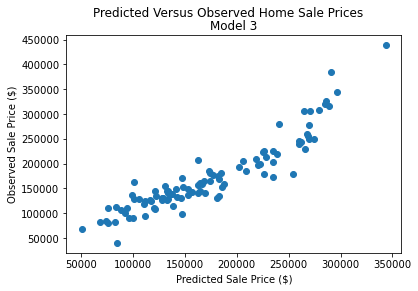

In [58]:
# Plot predicted versus observed home sale prices for the second MIT Model.
plt.scatter(predictions3, Y)
plt.suptitle('Predicted Versus Observed Home Sale Prices')
plt.title('Model 3')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Observed Sale Price ($)')

[Back to top](#Index)

### 3.3 Results

In addition to the Coefficient of Determination (*R*-squared), the metrics Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) will be computed to further explore the accuracy of the predictions.

|Metric|Description|
|:------|:-----------|
|Coefficient of Determination (*R*-squared)|the proportion of variance in the dependent variable that is explained by the linear regression value.<br />The value of *R*-squared is always less than one.
|Mean Absolute Error (MAE)|the average of the absolute difference between predicted and actual values in the dataset.<br />It measures the average of the residuals.
|Mean Squared Error (MSE)|the average of the squared difference between predicted and actual values in the dataset.<br />It measures the variance of the residuals.
|Root Mean Squared Error (RMSE)|the square root of the Mean Squared Error (MSE).<br />It measures the standard deviation of the residuals.

Lower values of the MAE, the MSE, and the RSME all represent a more accurate regression model, while a higher value of *R*-squared represents a more accurate model. RMSE and *R*-squared are both useful for comparing how well linear regression models fit a dataset. 

The tables below compare results using both *R*-Squared and RMSE metrics, confirming that the accuracy of the predictions are consistent. (Recall that lower values of RSME represent a more accurate regression model, while a higher value of *R*-squared represents a more accurate model.)


|   |Model 1|   |First MIT Model|     |Model 2a|   |First MIT Model|     |Model 2b|   |First MIT Model|  
|:---:|:-------:|:---:|:---------:|:-----:|:---------:|:---:|:---------:|:-----:|:---------:|:---:|:---------:|
|**R**<sup>2</sup>**|0.7882|>|0.7502|     |0.7875|>|0.7502|     |0.8166|>|0.7502|
|**RMSE**|30599.1|<|33230.0|     |30647.1|<|33230.0|     |28475.2|<|33230.0|

|   |Model 1|   |Model 2a|     |Model 1|   |Model 2b|     |Model 2a|   |Model 2b|  
|:---:|:-------:|:---:|:---------:|:-----:|:---------:|:---:|:---------:|:-----:|:---------:|:---:|:---------:|
|**R<sup>2</sup>**|0.7882|>|0.7875|     |0.7882|<|0.8166|     |0.7875|<|0.8166|
|**RMSE**|30599.1|<|30647.1|     |30599.1|>|28475.2|     |30647.1|>|28475.2|

|   |Model 3|   |Second MIT Model|  
|:---:|:-------:|:---:|:---------:|
|**RMSE**|27932.3|<|29548.5|
|**R<sup>2</sup>**|0.8490|>|0.8310|

To summarize, the results of this project show that Models 1 and 2 perform better than the first MIT model, and Model 3 performs better than the second MIT model. 

* In each case, the new models are additive, i.e., new variables are added to the existing variables in the original models. 


* In addition, Model 2b performs better than Model 2a when, again, additional variables are added to existing variables.


* Counterintuitively, Model 1 performs slightly better than Model 2a, even though the added variable FullBath in Model 2a has a greater correlation coefficient than the added variable WoodDeckSF in Model 1.


Note: By using a Seaborn pairplot graph, it may be seen that the discrepancy between the models with the FullBath and WoodDeckSF variables may be attributed to the data values themselves. Values in FullBath are integers, with values of 1, 2, or 3. Values in WoodDeckSF are floating point numbers, with many different values ranging from 0 to 300.

In [59]:
# First MIT Model

mae79 = mean_absolute_error(y_true=Y79,y_pred=predictions79)
#squared True returns MSE value, False returns RMSE value.
mse79 = mean_squared_error(y_true=Y79,y_pred=predictions79) #default=True
rmse79 = mean_squared_error(y_true=Y79,y_pred=predictions79,squared=False)
r79 = model79.score(X79,Y79)
  
print("MAE:",mae79)
print("MSE:",mse79)
print("RMSE:",rmse79)
print("R^2:",r79)

MAE: 29251.552513800016
MSE: 1104293866.6446009
RMSE: 33230.91733077197
R^2: 0.7501993255220817


In [60]:
# Model 1

mae1 = mean_absolute_error(y_true=Y1,y_pred=predictions1)
#squared True returns MSE value, False returns RMSE value.
mse1 = mean_squared_error(y_true=Y1,y_pred=predictions1) #default=True
rmse1 = mean_squared_error(y_true=Y1,y_pred=predictions1,squared=False)
r1 = model1.score(X1,Y1)
  
print("MAE:",mae1)
print("MSE:",mse1)
print("RMSE:",rmse1)
print("R^2:",r1)

MAE: 25729.237490880718
MSE: 936303999.7876314
RMSE: 30599.084950168548
R^2: 0.7882000636533495


In [61]:
# Model 2a

mae2 = mean_absolute_error(y_true=Y2,y_pred=predictions2)
#squared True returns MSE value, False returns RMSE value.
mse2 = mean_squared_error(y_true=Y2,y_pred=predictions2) #default=True
rmse2 = mean_squared_error(y_true=Y2,y_pred=predictions2,squared=False)
r2 = model2.score(X2,Y2)
  
print("MAE:",mae2)
print("MSE:",mse2)
print("RMSE:",rmse2)
print("R^2:",r2)

MAE: 26718.686785224876
MSE: 939245456.0093148
RMSE: 30647.11170745646
R^2: 0.787534681212753


In [62]:
# Model 2b

mae2a = mean_absolute_error(y_true=Y2a,y_pred=predictions2a)
#squared True returns MSE value, False returns RMSE value.
mse2a = mean_squared_error(y_true=Y2a,y_pred=predictions2a) #default=True
rmse2a = mean_squared_error(y_true=Y2a,y_pred=predictions2a,squared=False)
r2a = model2a.score(X2a,Y2a)
  
print("MAE:",mae2a)
print("MSE:",mse2a)
print("RMSE:",rmse2a)
print("R^2:",r2a)

MAE: 24363.517906720866
MSE: 810836000.1902301
RMSE: 28475.18218010607
R^2: 0.8165819933837561


In [63]:
# Second MIT Model

mae710 = mean_absolute_error(y_true=Y710,y_pred=predictions710)
#squared True returns MSE value, False returns RMSE value.
mse710 = mean_squared_error(y_true=Y710,y_pred=predictions710) #default=True
rmse710 = mean_squared_error(y_true=Y710,y_pred=predictions710,squared=False)
r710 = model710.score(X710,Y710)
  
print("MAE:",mae710)
print("MSE:",mse710)
print("RMSE:",rmse710)
print("R^2:",r710)

MAE: 22547.007278487672
MSE: 873115927.2942101
RMSE: 29548.535112492635
R^2: 0.8309859964337734


In [64]:
# Model 3

mae3 = mean_absolute_error(y_true=Y3,y_pred=predictions3)
#squared True returns MSE value, False returns RMSE value.
mse3 = mean_squared_error(y_true=Y3,y_pred=predictions3) #default=True
rmse3 = mean_squared_error(y_true=Y3,y_pred=predictions3,squared=False)
r3 = model3.score(X3,Y3)
  
print("MAE:",mae3)
print("MSE:",mse3)
print("RMSE:",rmse3)
print("R^2:",r3)

MAE: 20673.927328168676
MSE: 780214420.1474481
RMSE: 27932.318560181287
R^2: 0.8489694682378787


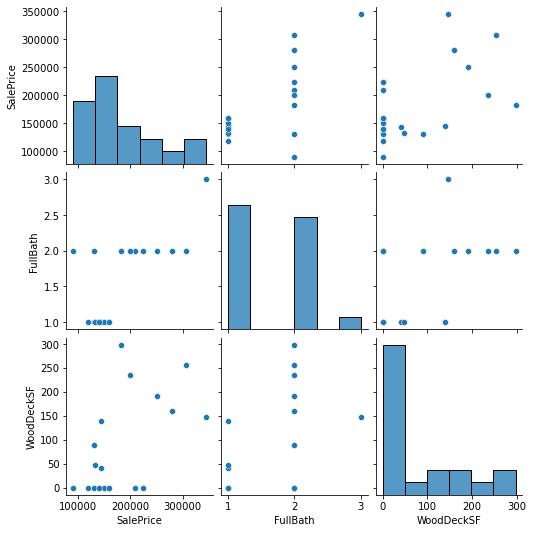

In [65]:
SaleBathDeck = sns.pairplot(train, vars=['SalePrice', 'FullBath', 'WoodDeckSF'])

# 'SalePrice','OverallQual', 'MasVnrArea', 'FullBath', 'WoodDeckSF'

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

In this section, the prediction models are tested against the test data from file jtest.csv to confirm the accuracy of the models on new data. The test data is located in the file `jtest.csv` 

For all prediction models, including the first and second MIT models, accuracy is consistently less when tested against the test data. Relationships between the models, however, remain consistent when compared to the training results, as shown in the table below. 

|   |Train **R<sup>2</sup>**|   |Test **R<sup>2</sup>**|  
|:---:|:-------:|:---:|:---------:|
|**First MIT Model**|0.7502|> |0.6257|
|**Model 1**|0.7882|>|0.6375|
|**Model 2-1**|0.7875|>|0.6332|
|**Model 2-2**|0.8166|>|0.7058|
|**Second MIT Model**|0.8310|>|0.8019|
|**Model 3**|0.8490|>|0.8076|

A reason for prediction accuracy being less for the test data could be that the results for the training models are based on the data used to create the training models, while the test data is completely different.

In [66]:
# First MIT Model
cols79 = ['SalePrice','OverallQual', 'MasVnrArea']
X = testclean[cols79]
Y = testclean['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
model.score(X,Y)

0.6256527810615473

In [68]:
# Model 1
# Add wood deck to first MIT model
cols1 = ['SalePrice','OverallQual', 'MasVnrArea', 'WoodDeckSF']
X = testclean[cols1]
Y = testclean['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
model.score(X,Y)

0.6374789397612781

In [69]:
# Model 2-1
# Add full bathrooms to first MIT model
cols2 = ['SalePrice','OverallQual', 'MasVnrArea', 'FullBath']
X = testclean[cols2]
Y = testclean['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
model.score(X,Y)

0.6331977530338705

In [70]:
# Model 2-2
# Add full, half, full-basement, and half-basement bathrooms to first MIT model
cols2a = ['SalePrice','OverallQual', 'MasVnrArea', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
X = testclean[cols2a]
Y = testclean['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
model.score(X,Y)

0.7057761920804957

In [71]:
# Second MIT Model
X = testclean[colst2]
Y = testclean['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
model.score(X,Y)

0.8018627714094284

In [72]:
# Model 3
X = test[colst2a]
Y = test['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)
model.score(X,Y)

0.807619473906767

# [Back to top](#Index)

## Conclusion

For my project, I developed three models based on the first and second MIT models presented in the MIT Data Engineering course. 

* My Models 1, 2a, and 2b are based on the approach in the first MIT model, which uses a training dataset containing the first 20 observations from the 100 observations in the original data set. 

* My Model 3 is based on the approach in the second MIT model, which uses a training dataset containing all 100 observations from the original data set. 

My conclusions are based on:

1. comparing the approaches used in the two MIT models, 

2. comparing my models with the corresponding MIT models, and 

3. comparing all of my models with each other .

### Conclusion 1:
The training models based on 100 observations consistently had greater predictive accuracy than the models based on 20 observations, both in initial results and when tested against test data. This result leads to the conclusion that it is better to include more observations in the training dataset.

### Conclusion 2:
In all three of my models, adding variables with nonnegative correlation coefficients to existing variables in another model consistently improved predictive accuracy. This result leads to the conclusion that the predictive accuracy of a multiple regression model can be improved by adding variables with positive coefficients.

### Conclusion 3:
Adding the variable WoodDeckSF improved predictive accuracy more than adding FullBath, even though FullBath had a stronger correlation with SalePrice than WoodDeckSF. This result leads to the conclusion that there are factors other than correlation strength that can determine how different variables will affect the predictive accuracy of a multiple linear regression model. 

## Suggestions for Further Learning

Here are three additional topics I would like to explore after completing this project:

### 1. How have other researchers analyzed the Ames Housing data?
As I mentioned at the beginning of this report, a Google search on "Ames housing dataset" returns 218,000 results! I look forward to exploring how other data scientists approach this data and to seeing how they present their findings.

### 2. What else needs to be done to data to improve predictive accuracy?
An example was given in the MIT Data Engineering course of a data set that had a logarithmic distribution rather than a normal one. Taking the logs of the original data values made the analysis more productive. I look forward to exploring techniques for making data better suited for analysis. 

### 3. How could I take a more experimental approach to analyzing data so that I can draw better conclusions?
I found myself repeatedly doing quick-and-dirty “What if?” analyses to see what interesting patterns I could discover. Upon reflection, I would have been more productive if I had been more methodical about the process. 


[Back to top](#Index
)
## References

- Chugh, Akshita. "MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared — Which Metric is Better?" *Analytics Vidhya*, 2020. https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e
- de Cock, Dean. "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project." *Journal of Statistics Education* Volume 19, No. 3(2011). www.amstat.org/publications/jse/v19n3/decock.pdf
- Gupta, Alind. "Python: inear Regression Using sklearn." *Geeks for Geeks*, 2022. https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
- Kargin, Kerem. "Multiple Linear Regression Fundamentals and Modeling in Python." *MLearning.ai*, 2021. https://medium.com/mlearning-ai/multiple-linear-regression-fundamentals-and-modeling-in-python-60db7095deff
- Prasad, Dipanshu."sklearn-Linear Regression under the Hood." *Analytics Vidhya*, 2020. https://medium.com/analytics-vidhya/sklearn-linear-regression-under-the-hood-31ee71aec00
- Priya, Lekha. New Aspects to consider while moving from Simple Linear Regression to Multiple Linear Regression." *Analytics Vidhya*, 2019. https://medium.com/analytics-vidhya/new-aspects-to-consider-while-moving-from-simple-linear-regression-to-multiple-linear-regression-dad06b3449ff 
- "Sales Prices of Houses in Ames, Iowa." Community Prediction Competition, 2018. https://www.kaggle.com/competitions/stat101ahouseprice/overview
- "The 10 Best ROI Home Improvement Projects for 2022." Coldwell Banker Elite, 2022. https://coldwellbankerelite.com/the-10-best-roi-home-improvement-projects-for-2022/ 
- Williams, Dima. "6 Features That Determine a Home's Final Sale Price." *Money*, 2021. https://money.com/how-to-price-a-home/